# Análise dos Dados de Acervo das Bibliotecas da UFRN

## 1. Introdução

Bibliotecas fornecem o suporte informacional para o desenvolvimento intelectual dos integrantes de uma comunidade acadêmica, contribuindo para a produtividade através da disponibilização de diversos materiais. De acordo com um estudo divulgado pela revista acadêmica College & Research Libraries, sob autoria de Krista M. Soria, Jan Fransen, and Shane Nackerud, alunos que usam os recursos das bibliotecas acadêmicas, pelo menos uma vez no primeiro ano de ensino superior, possuem uma maior probabilidade de se formarem ou permanecerem na instituição acadêmica após 4 anos.

Diante disso, tornou-se objetivo deste projeto analisar informações referentes ao acervo das bibliotecas da Universidade Federal do Rio Grande do Norte (UFRN), por meio de dados obtidos através do [Portal de Dados Abertos da UFRN](http://dados.ufrn.br/). O sistema de bibliotecas da UFRN é composto pela Biblioteca Central Zila Mamede (BCZM), a qual possui mais de 434.500 exemplares, e outras 21 bibliotecas setoriais. 

Para a realização deste trabalho, foram utilizados 48 arquivos .csv, os quais estão localizados na pasta "data" disponibilizada em conjunto com este notebook. Através desses arquivos, abaixo são criados 5 datasets, os quais estarão disponibilizados dentro de um dicionário, sendo eles:
     - dfs["discentes"]: composta por 10 arquivos, apresenta o detalhamento de suas colunas no arquivo "dicionario-discente.pdf", armazenando o nome de alunos ingressantes na UFRN, entre 2009 e 2018.
    - dfs["emprestimos"]: composta por 35 arquivos, apresenta dados de empréstimos desde o primeiro semestre do ano 2000 até o segundo semestre de 2017. O detalhamento de suas colunas pode ser encontrado em "dicionario-emprestimo.pdf.
    - dfs["cursos"]: composto pelo arquivo "cursos-ufrn.csv", apresenta dados referentes aos cursos ofertados pela UFRN. Seu detalhamento encontra-se em "dicionario-cursos-da-ufrn.pdf".
    - dfs["exemplares"]: fornece dados referentes aos exemplares presente na UFRN, proveniente do arquivo "exemplares.csv", sendo seu detalhamento presente em "dicionario-exemplares.pdf".
    - dfs["acervo-exemplares"]: apresenta informações a cerca dos materiais presentes no acervo das bibliotecas da UFRN. As informações referentes às suas colunas encontram-se no "dicionario-acervo-exemplares.pdf" e seus dados foram retirados do arquivo "exemplares-acervo.csv".

In [1]:
#Bibliotecas a serem utilizadas
import re
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Junção dos datasets

In [2]:
# Variável com os dataframes que iremos usar
dfs = {
    'discentes': None,
    'emprestimos': None,
    'cursos': pd.read_csv('data/cursos-ufrn.csv', sep=';'),
    'exemplares': pd.read_csv('data/exemplares.csv', sep=';'),
    'acervo-exemplares': pd.read_csv('data/exemplares-acervo.csv', sep=";")
}

In [3]:
# Arquivos da pasta de datasets
files = listdir('data')
# Regex para cada tipo de dataset que possui vários arquivos
regex = {
    'discentes': re.compile(r'discentes-20[0-9]{2}'),
    'emprestimos': re.compile(r'emprestimos-20[0-9]{3}'),
}
# Filtros aplicados, lista de arquivos que satisfazem os regex
files_filter = {
    'discentes': list(filter(regex['discentes'].search, files)),
    'emprestimos': list(filter(regex['emprestimos'].search, files)),
}
# Mostra ambas as listas de arquivos
print(files_filter)

{'discentes': ['discentes-2009.csv', 'discentes-2010.csv', 'discentes-2011.csv', 'discentes-2012.csv', 'discentes-2013.csv', 'discentes-2014.csv', 'discentes-2015.csv', 'discentes-2016.csv', 'discentes-2017.csv', 'discentes-2018.csv'], 'emprestimos': ['emprestimos-20002.csv', 'emprestimos-20011.csv', 'emprestimos-20012.csv', 'emprestimos-20021.csv', 'emprestimos-20022.csv', 'emprestimos-20031.csv', 'emprestimos-20032.csv', 'emprestimos-20041.csv', 'emprestimos-20042.csv', 'emprestimos-20051.csv', 'emprestimos-20052.csv', 'emprestimos-20061.csv', 'emprestimos-20062.csv', 'emprestimos-20071.csv', 'emprestimos-20072.csv', 'emprestimos-20081.csv', 'emprestimos-20082.csv', 'emprestimos-20091.csv', 'emprestimos-20092.csv', 'emprestimos-20101.csv', 'emprestimos-20102.csv', 'emprestimos-20111.csv', 'emprestimos-20112.csv', 'emprestimos-20121.csv', 'emprestimos-20122.csv', 'emprestimos-20131.csv', 'emprestimos-20132.csv', 'emprestimos-20141.csv', 'emprestimos-20142.csv', 'emprestimos-20151.csv'

In [4]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Junta todos os dados de discentes em um unico dataframe
dfs['discentes'] = make_df(files_filter['discentes'])
# O mesmo para emprestimos
dfs['emprestimos'] = make_df(files_filter['emprestimos'])

## Distribuição de Empréstimos por Vínculo Institucional

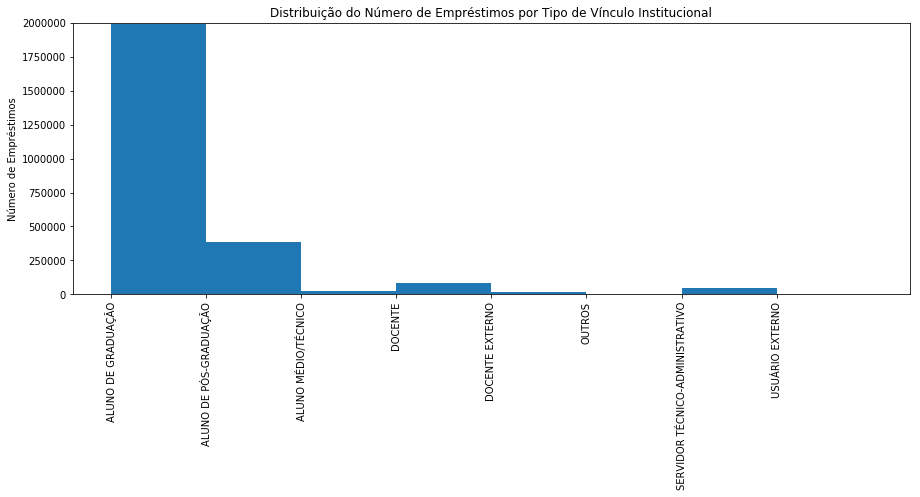

In [5]:
#Histograma de distribuição dos empréstimos pelo tipo de vínculo institucional
fig, ax = plt.subplots()
ax.hist(dfs["emprestimos"]["tipo_vinculo_usuario"], bins=8, range=(0,8))
ax.set_title("Distribuição do Número de Empréstimos por Tipo de Vínculo Institucional")
ax.set_ylim(0,2000000)
ax.set_ylabel("Número de Empréstimos")
plt.xticks(rotation=90)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

Como apresentado acima, tem-se que a maior quantidade de empréstimos é feita pelos alunos de graduação, seguido dos alunos de pós-graduação e os docentes da UFRN, enquanto que os demais vínculos apresentam números inferiores aos mencionados anteriormente. 

## Distribuição de Empréstimos por Discentes Ingressantes

In [6]:
#Renomeando em preparação para o merge entre o dataset "emprestimos" e o dataset "discentes"
emprestimos = dfs["emprestimos"].copy(deep=True)
discentes = dfs["discentes"].copy(deep=True)
emprestimos.rename(columns={'nome_usuario':'nome'}, inplace=True)
discentes.rename(columns={'nome_discente':'nome'}, inplace=True)
#Colunas selecionadas para o dataset 
columns = ["matricula", "nome","ano_ingresso","status","nome_curso",]
#Inner merge dos datasets
merge_discentes_emprestimos = discentes.merge(emprestimos, on="nome", how="inner")[columns]
#Conversão da coluna "ano_ingresso" para valores inteiros
merge_discentes_emprestimos["ano_ingresso"] = merge_discentes_emprestimos["ano_ingresso"].astype(np.int64)

Embora o ideal seja utilizar os IDs, foi-se decidido utilizar os nomes registrados, tendo-se a ressalva de que não é o método mais apropriado.


Para normalização dos dados usados, para a análise a seguir, considera-se apenas um dos empréstimos feitos pelo discente, sendo ele representado no segundo gráfico pelo ano em que ingressou na UFRN, com o intuito de comparar com o número de ingressantes por ano apresentados no primeiro gráfico.

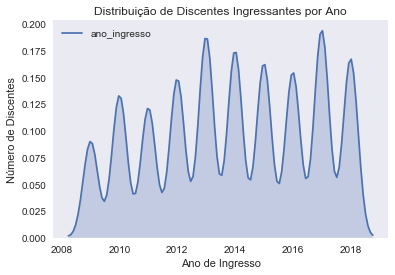

In [7]:
#Distribuição de Discentes Ingressantes por Ano
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(discentes["ano_ingresso"], shade=True)
plt.xlabel("Ano de Ingresso")
plt.ylabel("Número de Discentes")
plt.title("Distribuição de Discentes Ingressantes por Ano")
plt.show()

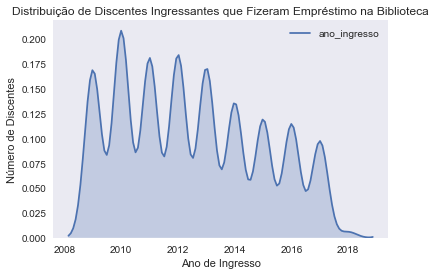

In [9]:
#Distribuição de discentes ingressantes que fizeram empréstimo na biblioteca
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(merge_discentes_emprestimos["ano_ingresso"][~merge_discentes_emprestimos["nome"].duplicated()], shade=True)
plt.xlabel("Ano de Ingresso")
plt.ylabel("Número de Discentes")
plt.title("Distribuição de Discentes Ingressantes que Fizeram Empréstimo na Biblioteca")
plt.show()

Diante dos gráficos de densidade, pode-se concluir que, embora os últimos anos tenham apresentado uma maior quantidade de alunos ingressantes, diante dos registros de empréstimos, tem-se que os ingressantes entre 2009 e 2013 apresentaram uma maior atividade na biblioteca, tendo pelo menos um registro de empréstimo, com destaque para os discentes ingressantes de 2010. Logo, pode-se concluir que a maior quantidade de discentes não implica diretamente em uma maior quantidade de registros como se é esperado. 

## Curiosidades

In [11]:
dfs["emprestimos"].shape

(2558703, 8)

In [12]:
dfs["emprestimos"][dfs["emprestimos"]["data_renovacao"].isnull() == False].shape

(1021754, 8)

Considerando os dados acima, tem-se que, aproximadamente, 40% dos registros de empréstimos foram renovados pelos usuários, logo, 4 em cada 10 materiais foram renovados.

## Distribuição de Materiais do Acervo por Tipo 

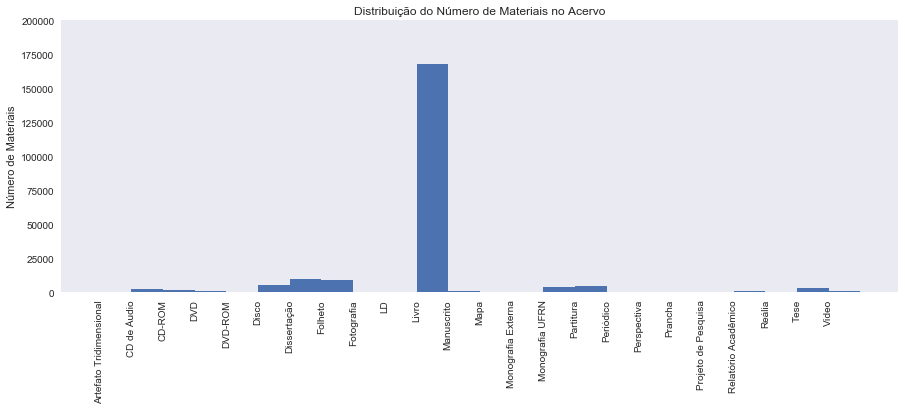

In [13]:
#Histograma da distribuição de materiais disponíveis no acervo pelo tipo 
fig, ax = plt.subplots()

ax.hist(dfs["acervo-exemplares"]["tipo_material"], bins=24, range=(0,24))
ax.set_title("Distribuição do Número de Materiais no Acervo")
ax.set_ylim(0,200000)
ax.set_ylabel("Número de Materiais")

fig.set_figheight(5)
fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.show()

Diante do gráfico desenvolvido, tem-se que, dentre os materiais registrados no acervo das bibliotecas da UFRN, encontra-se em destaque quantitativamente, como esperado, os livros, seguido de dissertações, folhetos e discos, dentre os vários tipos de matériais disponíveis para uso dos integrantes da instituição. 

## Recomendações de Exemplares para a Biblioteca

In [17]:
#Outer merge entre o dataset "emprestimos" e o dataset "exemplares"
merged = dfs["emprestimos"].copy(deep=True)
merged = merged.merge(dfs["exemplares"], on="codigo_barras", how="outer")
#Retirando os que não possuem registro_sistema em preparação para outro merge
merged = merged[merged["registro_sistema"].isnull() == False]
#Conversão de dados para valores inteiros
merged["registro_sistema"] = merged["registro_sistema"].astype(np.int64)

In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601908 entries, 29 to 2859874
Data columns (total 14 columns):
id_emprestimo           float64
codigo_barras           object
data_renovacao          object
data_emprestimo         object
data_devolucao          object
nome_usuario            object
id_vinculo_usuario      float64
tipo_vinculo_usuario    object
id_exemplar             float64
colecao                 object
biblioteca              object
status_material         object
localizacao             object
registro_sistema        int64
dtypes: float64(3), int64(1), object(10)
memory usage: 297.8+ MB


In [19]:
#Colunas a serem levadas em consideração 
columns = ["id_emprestimo", "codigo_barras","nome_usuario", "id_vinculo_usuario", "tipo_vinculo_usuario", "id_exemplar", "colecao",
           "biblioteca", "status_material", "localizacao", "titulo", "autor", "tipo_material","quantidade","ano","edicao",
           "editora", "registro_sistema"]
#Inner merge com "acervo-exemplares"
merged_info = merged.merge(dfs["acervo-exemplares"], on="registro_sistema", how="inner")[columns]

In [20]:
#Frequência de empréstimos por exemplar
quantity = pd.DataFrame(merged_info["registro_sistema"].value_counts().reset_index())
quantity.columns = ["registro_sistema","quant_emprestimos"]

In [21]:
#Colunas selecionadas para o merge
columns = ["registro_sistema", "quant_emprestimos", "colecao", "biblioteca", "status_material", "titulo", "autor",
           "tipo_material", "ano", "edicao", "editora"]
#Inner merge para pegar informações sobre os exemplares
quantity_info = quantity.merge(dfs["acervo-exemplares"], on="registro_sistema", how="inner")

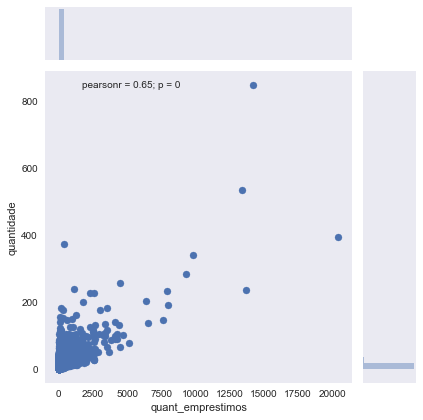

In [22]:
#Gráfico de correlação entre a quantidade de empréstimos e a quantidade de exemplares disponíveis no acervo da biblioteca
sns.jointplot(x=quantity_info['quant_emprestimos'], y=quantity_info['quantidade'])

Com base no gráfico de correlação entre a quantidade de empréstimos e a quantidade de exemplares disponíveis para cada título, embora tenham alguns que apresentem a característica de possuir uma maior quantidade de empréstimos sendo suprida por uma quantidade significativa de exemplares disponíveis, ao observar-se a distribuição do gráfico e o índice de correlação, tem-se que isso não se aplica a todos os títulos registrados no acervo. Diante disso, foi-se decidido apresentar como recomendação alguns títulos que apresentam uma alta demanda de empréstimos, mas que possuem menos de 10 exemplares disponíveis nas bibliotecas, com o objetivo de apresentar títulos que poderiam beneficiar, com uma maior disponibilização de exemplares, os integrantes da instituição diante da possível disputa pelo empréstimo.

In [23]:
#Recomendação de exemplares 
quantity_info[(quantity_info["quantidade"] < 10 ) & (quantity_info["quant_emprestimos"] > 500)]

,registro_sistema,quant_emprestimos,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
287,71288,815,Mecânica estática /,NaN,Mecânica.#$&Estática#$&Dinâmica#$&Engenharia,"Meriam, J.L",Livro,9,c2004.,5.ed.,"LTC,",8521614020,NaN
329,24061,738,Introdução à termodinâmica da engenharia quími...,NaN,Engenharia química.#$&Termodinâmica.,"Smith, J. M.",Livro,9,c2000.,5. ed. -,"LTC,",8521611943 (broch.).,NaN
368,29415,679,Atlas de anatomia humana /,NaN,Anatomia humana -#$&Atlas.,"Netter, Frank H.",Livro,7,1999,2. ed. -,"Artmed,",8573075333,NaN
376,21931,675,Hidrologia :,ciência e aplicação /,Hidrologia.,NaN,Livro,9,1997.,2.ed.-,"Editora da UFRS ;#$&ABRH,",8570252986 (broch.),NaN
393,29263,652,Fundamentos da biologia celular :,uma introdução à biologia molecular da célula /,Célula.#$&Citologia.#$&Biologia molecular.#$&B...,NaN,Livro,8,1999.,NaN,"Artes Médicas ,",8573074949,NaN
410,58344,635,Tratado de infectologia /,NaN,Doenças transmissíveis.#$&Doenças parasitárias...,NaN,Livro,8,2002.,2. ed. --,"Atheneu,",NaN,NaN
431,85552,610,Decifrando a terra /,NaN,Geociências -#$&Estudo e ensino (Superior).#$&...,NaN,Livro,9,2000.,NaN,"Oficina de textos,",8586238147 (broch.),NaN
433,70825,609,Endodontia :,biologia e técnica /,Endodontia.#$&Doenças da polpa dentária.#$&Cir...,"Lopes, Hélio Pereira.",Livro,9,c2004.,2. ed.,"MEDSI,",852770938,NaN
435,80718,608,Direito constitucional /,NaN,Direito constitucional.,"Moraes, Alexandre de.",Livro,9,2006.,19. ed. atual. -,"Átlas,",8522442827,NaN
460,58789,577,Imunologia /,NaN,Imunologia.,"Roitt, Ivan Maurice,",Livro,8,2003.,6. ed. --,"Manole,",8520414397 (broch.),NaN


## Referências

Disponível em: <http://dados.ufrn.br/dataset/acervo-biblioteca>. Acesso em: 26/11/2018.

Disponível em: <http://dados.ufrn.br/dataset/discentes>. Acesso em: 26/11/2018.

Disponível em: <http://dados.ufrn.br/dataset/cursos-ufrn>. Acesso em: 26/11/2018.

Disponível em: <http://dados.ufrn.br/dataset/emprestimos-acervos-das-bibliotecas>. Acesso em: 28/11/2018.

Disponível em: <http://www.sisbi.ufrn.br/pagina.php?a=historico#.XASluWhKjIW>. Acesso em: 02/12/2018.

Disponível em: <http://sisbi.ufrn.br/bczm/pagina.php?a=historico#.XASuq2hKjIW>. Acesso em: 02/12/2018.

Disponível em: <https://crl.acrl.org/index.php/crl/article/view/16737/18250>. Acesso em: 02/12/2018.